In [1]:
using POMDPs
using OPCSPs
using POMDPToolbox

In [2]:
rng = MersenneTwister(8)
problem = gen_two_cluster_problem(rng=rng);

In [3]:
sim = HistoryRecorder(rng=rng)
# policy = RandomPolicy(problem, rng=MersenneTwister(79))
policy = SolveMeanFeedback(problem)
simulate(sim, problem, policy, updater(problem), initial_belief(problem))

88.0671435349793

In [4]:
sim = RolloutSimulator(rng=rng)
@time simulate(sim, problem, policy, updater(problem), initial_belief(problem))

88.0671435349793

In [11]:
Profile.clear()
@time @profile begin
    for i in 1:100
        print("\r$i")
        simulate(sim, problem, policy, updater(problem), initial_belief(problem))
    end
end

100  3.314525 seconds (1.32 M allocations: 124.142 MB, 2.17% gc time)


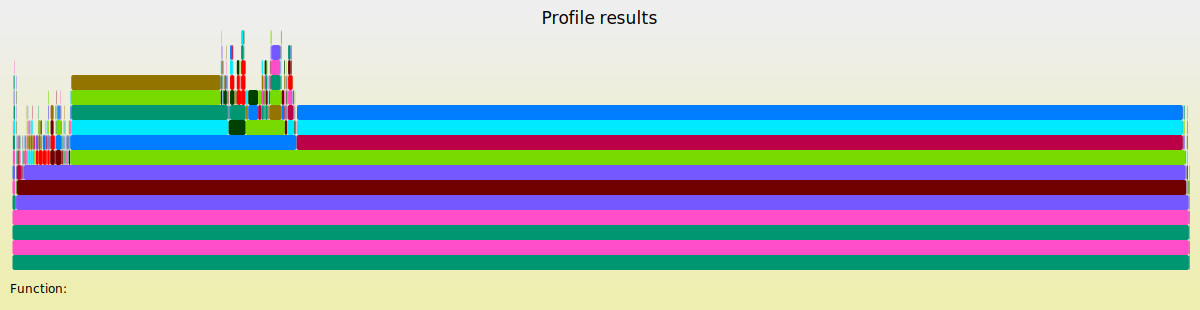

In [12]:
import ProfileView
ProfileView.view()